# Linear Models for Classification

### 1. What is Logistic Regression?

Despite the name, Logistic Regression is a classification algorithm, not regression.

It is mainly used when the target variable is categorical (e.g., 0/1, Yes/No, Spam/Not Spam).

Example use cases:

- Predict if an email is spam (0 = No, 1 = Yes).
- Predict if a customer will churn (0 = Stay, 1 = Leave).
- Predict if a tumor is malignant or benign.

### 2. Why not Linear Regression?

Suppose we try to use Linear Regression for classification:

Model:

$$ y=w_0+w_1x $$

But y is continuous and can take any real value (like -5, 2.7, 100, etc).

For classification, we want probability values between 0 and 1.

So we need a function that:
- Maps any real number to a range between 0 and 1.
- Can be interpreted as a probability.
This is where the Sigmoid Function comes in.

### 3. Sigmoid (Logistic) Function

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- If $ z→+∞, σ(z)→1. $

- If $ z→−∞, σ(z)→0. $

- If $ z=0, σ(z)=0.5. $

This function converts linear output into a probability.

Logistic Regression Model:

$$
p(y = 1 \mid x) = \sigma \big( w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n \big)
$$

Where:

p(y = 1 | x) = probability that output is 1.

- if probability ≥ 0.5 → class 1, else class 0.

### 4. Odds and Logit

Another way to see logistic regression:

- Odds = (probability of success / failure).

$$
\frac{p}{1−p}
$$
	​

Taking log of odds:

$$
\log\left(\frac{p}{1 - p}\right) = w_0 + w_1 x_1 + \cdots + w_n x_n
$$


This is why it’s called Logistic Regression — it models the log-odds as a linear function.

### 5. Cost Function (Loss Function)

We can’t use Mean Squared Error (MSE) because it makes optimization hard for sigmoid.

Instead, we use Log Loss (Cross-Entropy Loss):

$$
L = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log\big(p^{(i)}\big) + (1 - y^{(i)}) \log\big(1 - p^{(i)}\big) \right]
$$

Where:

- $  m  $ = number of samples

- $  y^{(i)}  $ = true label (0 or 1)

- $  p^{(i)}  $ = predicted probability
 
This loss is low when predictions are close to true labels, high when wrong.

### 6. Optimization (Gradient Descent)

We update weights using Gradient Descent:

1. Initialize weights randomly.

2. Compute predictions with sigmoid.

3. Compute loss (Log Loss).

4. Update weights:

$$
w_j = w_j - \alpha \cdot \frac{\partial L}{\partial w_j}
$$

Where $ \alpha $ is the learning rate.

### 7. Steps of Logistic Regression Algorithm

- Start with dataset features $ \mathbf{X} $, labels $ \mathbf{y} $.

- Initialize weights $ \mathbf{w} $.

- For each iteration:

  1. Compute linear output: $ \mathbf{z} = \mathbf{X} \mathbf{w} $

  2. Apply sigmoid: $ \mathbf{p} = \sigma(\mathbf{z}) $

  3. Compute loss (Log Loss).

  4. Update weights using gradient descent.

- After training, use  $ p \geq 0.5 $ as classification rule.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load dataset
data = load_breast_cancer()

# Features (X) and Target (y)
X = data.data
y = data.target

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)
print("Target classes:", data.target_names)  # malignant(0), benign(1)


Feature matrix shape: (569, 30)
Target shape: (569,)
Target classes: ['malignant' 'benign']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Create model
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Train model
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [7]:
# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Predicted probabilities
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]  # probability of class 1


In [8]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9824561403508771

🔹 Confusion Matrix:
 [[41  1]
 [ 1 71]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



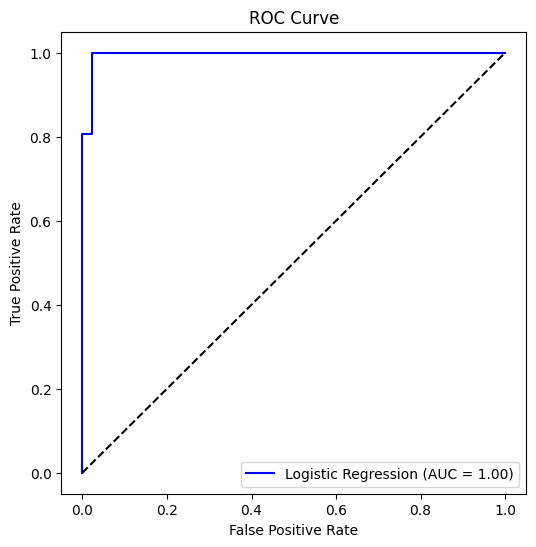

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.2f})", color="blue")
plt.plot([0,1], [0,1], "k--")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


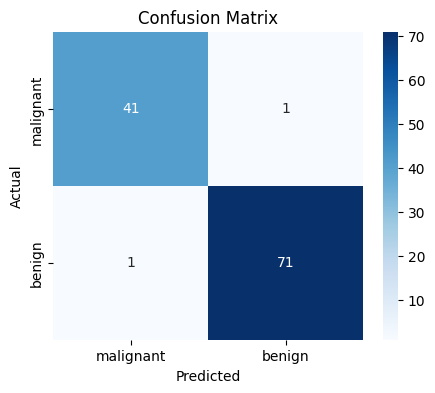

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Logistic Regression Coefficients & Feature Importance

In [18]:
# Intercept (bias term)
print("Intercept:", log_reg.intercept_)

# Coefficients for each feature
coeff_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeff_df.head(10))  # top 10 features with strongest effect


Intercept: [0.30220757]
                    Feature  Coefficient
5          mean compactness     0.648342
15        compactness error     0.647227
19  fractal dimension error     0.437894
18           symmetry error     0.360492
11            texture error     0.248823
9    mean fractal dimension     0.199732
16          concavity error     0.160563
25        worst compactness     0.055514
14         smoothness error    -0.160276
8             mean symmetry    -0.167233


- Top positive coefficients → features that make class 1 (benign) more likely.

- Top negative coefficients → features that make class 0 (malignant) more likely.

- Magnitude = importance strength.

### 1. Logistic Regression Model Recap

The logistic regression model predicts the probability of a binary outcome using:

$$
p(y=1 \mid \mathbf{x}) = \sigma(w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_n x_n)
$$

Where:

- $w_0$: intercept (bias term)  
- $w_j$: coefficient for feature $x_j$

The sigmoid (logistic) function is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

---

### 2. What a Coefficient Means

Each coefficient $w_j$ represents the effect of a **one-unit increase** in feature $x_j$ on the **log-odds** of the outcome (keeping other features fixed).

Log-odds form of the logistic regression model:

$$
\log\left(\frac{p}{1 - p}\right) = w_0 + w_1 x_1 + \cdots + w_n x_n
$$

**Interpretation:**

- If $w_j > 0$: increasing $x_j$ makes the outcome **more likely to be class 1**
- If $w_j < 0$: increasing $x_j$ makes the outcome **more likely to be class 0**
- The magnitude $|w_j|$ shows **how strong** the effect is

---

### 3. Odds Ratio (More Intuitive)

To make interpretation easier, convert coefficients into **odds ratios**:

$$
\text{Odds Ratio} = e^{w_j}
$$

**Interpretation:**

- If **Odds Ratio > 1** → feature **increases** odds of class 1  
- If **Odds Ratio < 1** → feature **decreases** odds of class 1  
- If **Odds Ratio = 1** → **no effect**

---

### 4. Example (Breast Cancer Dataset)

Suppose one feature is `mean radius` with coefficient:

$$
w = -0.85
$$

**Interpretation:**

A one-unit increase in **mean radius** decreases the **log-odds** of being **benign** (class 1).

$$
\text{Odds Ratio} = e^{-0.85} \approx 0.43
$$

So, each unit increase in radius **multiplies the odds** of being benign by **0.43**  
(i.e., **reduces** likelihood of benign, **increases** chance of malignant).


/var/folders/wz/x2l51s4j30j612942t1zm5gm0000gq/T/ipykernel_53474/2887331590.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coeff_df.head(10), palette="viridis")


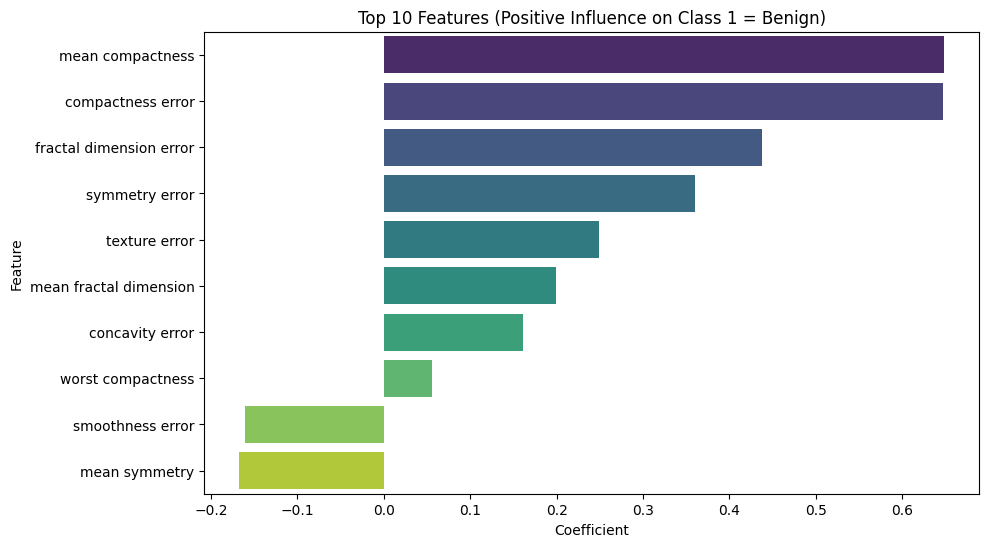

/var/folders/wz/x2l51s4j30j612942t1zm5gm0000gq/T/ipykernel_53474/2887331590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=coeff_df.tail(10), palette="magma")


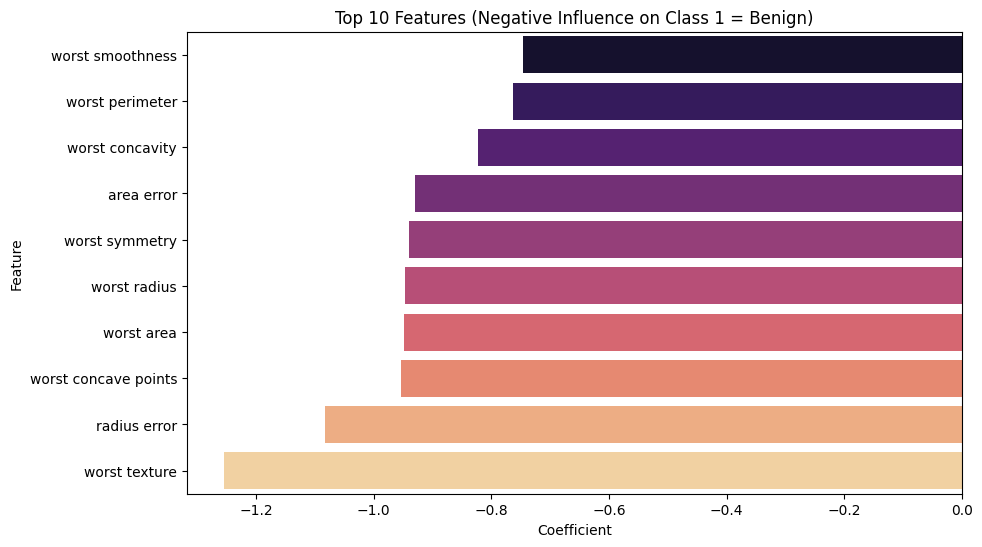

In [14]:
coeff_df = pd.DataFrame({
    "Feature": data.feature_names,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coeff_df.head(10), palette="viridis")
plt.title("Top 10 Features (Positive Influence on Class 1 = Benign)")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coeff_df.tail(10), palette="magma")
plt.title("Top 10 Features (Negative Influence on Class 1 = Benign)")
plt.show()


### Regularization in Logistic Regression

Regularization helps prevent overfitting by penalizing large coefficients in the model.
Logistic Regression in scikit-learn has this built in.

### 1. Why Regularization?

- Logistic regression learns coefficients w for each feature.

- If features are correlated or noisy, coefficients can become very large, causing overfitting.

- Regularization adds a penalty to the cost function to keep weights small and stable.

### 2. Types of Regularization

Without regularization, Logistic Regression minimizes the log loss:

$$
L = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log\big(p^{(i)}\big) + (1 - y^{(i)}) \log\big(1 - p^{(i)}\big) \right]
$$

When we add regularization, we also penalize large coefficients:

**L2 (Ridge):**

$$
L = \text{Log Loss} + \lambda \sum_j w_j^2
$$

**Penalty term:**

$
\lambda \sum w_j^2
$

- Shrinks coefficients smoothly toward zero.  

- Keeps all features but reduces their impact.  

- Default in scikit-learn (`penalty="l2"`).


**L1 (Lasso):**

$$
L = \text{Log Loss} + \lambda \sum_j |w_j|
$$

**Penalty term:**

$
\lambda \sum |w_j|
$

- Pushes some coefficients exactly to zero.  

- Useful for feature selection.  

- In scikit-learn: `penalty="l1"`, solver must be `"liblinear"` or `"saga"`.

### What is Lambda (λ) in Regularization?

$$
\lambda \geq 0
$$

is the regularization strength.

If $ \lambda $ = 0 → no regularization → model may overfit.

Larger $ \lambda $ = more penalty $\rightarrow$ coefficients shrink more $\rightarrow$ simpler model.

Smaller $ \lambda $ = less penalty $\rightarrow$ coefficients can grow $\rightarrow$ model fits data more closely.

- If $ \lambda $ is very large → model heavily penalizes coefficients → many weights shrink toward 0 → underfitting possible.

So $\lambda$ controls the bias-variance tradeoff.


**L1 Regularization (Lasso)**



**Elastic Net**

**Combines L1 and L2:**

$$
\lambda_1 \sum |w_j| + \lambda_2 \sum w_j^2
$$

- Balance between shrinking and feature selection.

### 3. The C Parameter in scikit-learn

In scikit-learn, instead of $ \lambda $ , we use \( C \):

$$
C = \frac{1}{\lambda}
$$

- **Large \( C \)** → Less regularization (model fits more, higher risk of overfitting).  
- **Small \( C \)** → More regularization (simpler model, helps avoid overfitting).

Think of **C** as controlling the **inverse strength** of regularization.


### 4. Sklearn Example (Effect of Regularization)

In [17]:
from sklearn.linear_model import LogisticRegression

# L2 Regularization (default)
log_reg_l2 = LogisticRegression(penalty="l2", C=1.0, max_iter=500, random_state=42)
log_reg_l2.fit(X_train_scaled, y_train)
print("Accuracy with L2 (C=1.0):", log_reg_l2.score(X_test_scaled, y_test))

# Stronger Regularization (smaller C)
log_reg_strong = LogisticRegression(penalty="l2", C=0.01, max_iter=500, random_state=42)
log_reg_strong.fit(X_train_scaled, y_train)
print("Accuracy with stronger regularization (C=0.01):", log_reg_strong.score(X_test_scaled, y_test))

# L1 Regularization (needs solver='liblinear')
log_reg_l1 = LogisticRegression(penalty="l1", C=1.0, solver="liblinear", max_iter=500, random_state=42)
log_reg_l1.fit(X_train_scaled, y_train)
print("Accuracy with L1:", log_reg_l1.score(X_test_scaled, y_test))


Accuracy with L2 (C=1.0): 0.9824561403508771
Accuracy with stronger regularization (C=0.01): 0.9473684210526315
Accuracy with L1: 0.9912280701754386
